![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.4.1


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

In [4]:
# Path for the mobile-images folder in the drive
path = '/content/drive/MyDrive/mobile-images'

In [10]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread(path + "/yes-mobile/img121.png")  # Selecting one image from the yes-mobile folder

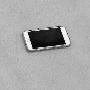

In [11]:
cv2_imshow(img)  # Display the image

In [13]:
img.shape  # Checking image size

(90, 90, 3)

In [14]:
img  # Pixel values for the image

array([[[184, 184, 184],
        [184, 184, 184],
        [182, 182, 182],
        ...,
        [181, 181, 181],
        [182, 182, 182],
        [182, 182, 182]],

       [[184, 184, 184],
        [182, 182, 182],
        [178, 178, 178],
        ...,
        [185, 185, 185],
        [178, 178, 178],
        [178, 178, 178]],

       [[185, 185, 185],
        [180, 180, 180],
        [176, 176, 176],
        ...,
        [186, 186, 186],
        [183, 183, 183],
        [183, 183, 183]],

       ...,

       [[176, 176, 176],
        [180, 180, 180],
        [184, 184, 184],
        ...,
        [175, 175, 175],
        [177, 177, 177],
        [178, 178, 178]],

       [[179, 179, 179],
        [181, 181, 181],
        [181, 181, 181],
        ...,
        [177, 177, 177],
        [176, 176, 176],
        [182, 182, 182]],

       [[179, 179, 179],
        [181, 181, 181],
        [181, 181, 181],
        ...,
        [177, 177, 177],
        [167, 167, 167],
        [172, 172, 172]]

### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [17]:
# Reading yes-mobile images as array after resizing to 128x128 and also saving its corresponding labels
yes_img = []
yes_label = []

for img in os.listdir(path + '/yes-mobile'):
  a = cv2.imread(path + '/yes-mobile/'+ img)
  a = cv2.resize(a,(128,128))
  yes_img.append(a)
  yes_label.append(1)    # append 1 as label for yes-mobile


In [18]:
len(yes_img)  # No. of yes-mobile images

124

In [19]:
# Reading no-mobile images as array after resizing to 128x128 and also saving its corresponding labels
no_img = []
no_label = []

for img in os.listdir(path + '/no-mobile'):
  a = cv2.imread(path + '/no-mobile/'+ img)
  a = cv2.resize(a,(128,128))
  no_img.append(a)
  no_label.append(0)  # append 0 as label for no-mobile

In [20]:
len(no_img)  # No. of no-mobile images

121

### Check shape and size of the images

In [21]:
yes_img[0].shape   # shape of yes-mobile image

(128, 128, 3)

In [22]:
no_img[0].shape   # shape of no-mobile image

(128, 128, 3)

###  What is the percentage of images with and without mobile phone in the data

In [23]:
len(no_img)/(len(no_img) + len(yes_img))  # percentatge of no-mobile images

0.49387755102040815

In [25]:
len(yes_img)/(len(no_img) + len(yes_img))  # percentatge of yes-mobile images

0.5061224489795918

### The images are balanced between the classes even when the no. of images is very less

### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [35]:
X_img = np.concatenate((yes_img, no_img), axis=0)

In [36]:
X_img.ndim

4

In [37]:
len(X_img)

245

In [38]:
y = np.concatenate((yes_label, no_label), axis=0)

In [39]:
y.ndim

1

In [40]:
len(y)

245

In [41]:
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
y[240:]

array([0, 0, 0, 0, 0])

### Shuffle the above data and labels ( Data and label should be in sync)

In [43]:
from sklearn.utils import shuffle

X, label = shuffle(X_img, y, random_state = 1)

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

[1 0 0 0 1 0 1 0 0 1]


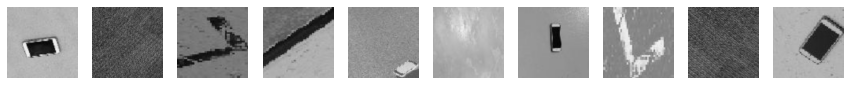

In [46]:
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X[i])
  plt.axis('off')
print(label[0:10])

### Split the data into train and test

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state = 1)

### Print shape of the X train and X test data

In [48]:
X_train.shape

(196, 128, 128, 3)

In [49]:
X_test.shape

(49, 128, 128, 3)

### Normalize the data by dividing by 255

In [50]:
X_train_std = X_train / 255.0

In [52]:
X_train_std[0]

array([[[0.68235294, 0.68235294, 0.68235294],
        [0.67843137, 0.67843137, 0.67843137],
        [0.67843137, 0.67843137, 0.67843137],
        ...,
        [0.69411765, 0.69411765, 0.69411765],
        [0.69019608, 0.69019608, 0.69019608],
        [0.69411765, 0.69411765, 0.69411765]],

       [[0.69411765, 0.69411765, 0.69411765],
        [0.68627451, 0.68627451, 0.68627451],
        [0.68235294, 0.68235294, 0.68235294],
        ...,
        [0.69803922, 0.69803922, 0.69803922],
        [0.69411765, 0.69411765, 0.69411765],
        [0.69803922, 0.69803922, 0.69803922]],

       [[0.70588235, 0.70588235, 0.70588235],
        [0.69803922, 0.69803922, 0.69803922],
        [0.69019608, 0.69019608, 0.69019608],
        ...,
        [0.70588235, 0.70588235, 0.70588235],
        [0.70196078, 0.70196078, 0.70196078],
        [0.70196078, 0.70196078, 0.70196078]],

       ...,

       [[0.71372549, 0.71372549, 0.71372549],
        [0.71764706, 0.71764706, 0.71764706],
        [0.71764706, 0

In [51]:
X_test_std = X_test / 255.0

In [53]:
X_test_std[0]

array([[[0.62745098, 0.62745098, 0.62745098],
        [0.61960784, 0.61960784, 0.61960784],
        [0.61568627, 0.61568627, 0.61568627],
        ...,
        [0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667]],

       [[0.60784314, 0.60784314, 0.60784314],
        [0.6       , 0.6       , 0.6       ],
        [0.59607843, 0.59607843, 0.59607843],
        ...,
        [0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667]],

       [[0.59215686, 0.59215686, 0.59215686],
        [0.58823529, 0.58823529, 0.58823529],
        [0.58039216, 0.58039216, 0.58039216],
        ...,
        [0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667],
        [0.66666667, 0.66666667, 0.66666667]],

       ...,

       [[0.54117647, 0.54117647, 0.54117647],
        [0.54509804, 0.54509804, 0.54509804],
        [0.54901961, 0

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [54]:
from tensorflow.keras.utils import to_categorical
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

In [55]:
y_test_en[5]

array([0., 1.], dtype=float32)

In [56]:
y_train_en[5]

array([1., 0.], dtype=float32)

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [62]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D , MaxPooling2D
from tensorflow.keras import layers

In [63]:
# Defining parameters
n_classes = 2
n_conv = 3
inputshape = (128,128,3)
batch_size = 20
epochs = 20

In [64]:
def cnn_model():
  model = Sequential()
  # Input Layer
  model.add(Conv2D(32,kernel_size=(n_conv,n_conv),activation='relu',input_shape=inputshape))
  model.add(MaxPooling2D(2,2))
  # Next layer
  model.add(Conv2D(64,kernel_size=(n_conv,n_conv),activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Flatten())
  # Output layer 
  model.add(Dense(n_classes,activation='softmax'))
  return model

In [65]:
cnn = cnn_model()

In [66]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 115202    
Total params: 134,594
Trainable params: 134,594
Non-trainable params: 0
__________________________________________________

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [68]:
ad = optimizers.Adam(lr=0.0001)
cnn.compile(optimizer=ad,loss = 'binary_crossentropy',metrics =['accuracy'])

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [70]:
history = acnn.fit(X_train_std,y_train_en, validation_data=(X_test_std,y_test_en), batch_size=32, epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 31ms/step - loss: 0.5458 - accuracy: 0.7755 - val_loss: 0.5150 - val_accuracy: 0.8980
Epoch 2/10
7/7 [==============================] - 0s 24ms/step - loss: 0.5225 - accuracy: 0.8163 - val_loss: 0.5017 - val_accuracy: 0.8776
Epoch 3/10
7/7 [==============================] - 0s 22ms/step - loss: 0.5004 - accuracy: 0.8367 - val_loss: 0.4599 - val_accuracy: 0.9184
Epoch 4/10
7/7 [==============================] - 0s 23ms/step - loss: 0.4792 - accuracy: 0.8316 - val_loss: 0.4738 - val_accuracy: 0.8367
Epoch 5/10
7/7 [==============================] - 0s 21ms/step - loss: 0.4658 - accuracy: 0.8265 - val_loss: 0.4249 - val_accuracy: 0.8980
Epoch 6/10
7/7 [==============================] - 0s 21ms/step - loss: 0.4381 - accuracy: 0.8469 - val_loss: 0.4047 - val_accuracy: 0.8980
Epoch 7/10
7/7 [==============================] - 0s 20ms/step - loss: 0.4196 - accuracy: 0.8520 - val_loss: 0.3878 - val_accuracy: 0.8980
Epoch 8/10
7/7 [===========

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [71]:
cnn.evaluate(X_test_std,y_test_en)

2/2 [==============================] - 0s 9ms/step - loss: 0.3497 - accuracy: 0.9184


[0.349694162607193, 0.918367326259613]

### Predict label data of the test data and check confusion matrix

In [72]:
y_pred = cnn.predict(X_test_std)

In [80]:
y_pred

array([[8.76213773e-04, 9.99123752e-01],
       [2.88983644e-03, 9.97110188e-01],
       [4.74289805e-01, 5.25710166e-01],
       [7.28768408e-01, 2.71231592e-01],
       [9.40631032e-01, 5.93688898e-02],
       [1.59089603e-02, 9.84091103e-01],
       [3.46350670e-02, 9.65364933e-01],
       [1.19056135e-01, 8.80943835e-01],
       [8.56176615e-01, 1.43823385e-01],
       [9.55272913e-01, 4.47270945e-02],
       [1.22346990e-01, 8.77653062e-01],
       [1.68770090e-01, 8.31229925e-01],
       [3.35942432e-02, 9.66405749e-01],
       [1.05258431e-02, 9.89474237e-01],
       [6.85743392e-01, 3.14256579e-01],
       [9.62592661e-01, 3.74073312e-02],
       [3.32912314e-03, 9.96670902e-01],
       [9.17303860e-01, 8.26961547e-02],
       [2.12380057e-03, 9.97876167e-01],
       [1.92285314e-01, 8.07714701e-01],
       [4.25068568e-03, 9.95749235e-01],
       [1.29711926e-02, 9.87028837e-01],
       [1.32706270e-01, 8.67293715e-01],
       [8.47822726e-01, 1.52177259e-01],
       [3.756216

In [77]:
y_pred_cl = cnn.predict_classes(X_test_std)

In [81]:
y_pred_cl

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0])

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_cl)

array([[18,  1],
       [ 3, 27]])

### Display test images and their predicted label for a few samples

[1 1 1 0 0 1 1 1 0 0]


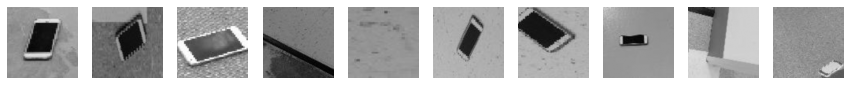

In [82]:
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_test_std[i])
  plt.axis('off')
print(y_pred_cl[0:10])

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

Text(0.5, 1.0, 'Training and validation loss')

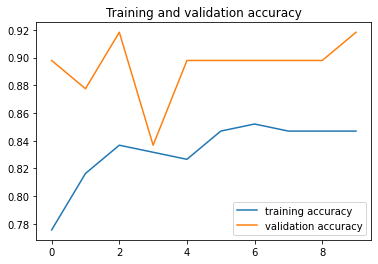

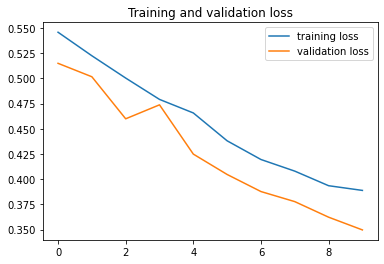

In [83]:
accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')


## 7.  Conclusion and Interpretation

### Write your observations and findings


1. There are 2 classes 
2. We can see our CNN model is highly overfit, as dataset size is small.
3. We can do some changes in the model and check the accuracy of the model.

## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network

In [97]:
# USING TRANSFER LEARNING VGG

from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze all the layers except for the last layer: 
for layer in vgg_conv.layers[:-3]:
    layer.trainable = False
 
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
model.summary() 


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 2050      
Total params: 23,106,370
Trainable params: 13,111,298
Non-trainable params: 9,995,072
_________________________________________________________________


In [88]:
ad = optimizers.Adam(lr=0.0001)
model.compile(optimizer=ad,loss = 'binary_crossentropy',metrics =['accuracy'])

In [89]:
history = model.fit(X_train_std,y_train_en, validation_data=(X_test_std,y_test_en), batch_size=32, epochs=10)

Epoch 1/10
7/7 [==============================] - 6s 501ms/step - loss: 0.6568 - accuracy: 0.6768 - val_loss: 0.1746 - val_accuracy: 0.9592
Epoch 2/10
7/7 [==============================] - 0s 62ms/step - loss: 0.1565 - accuracy: 0.9745 - val_loss: 0.1148 - val_accuracy: 0.9592
Epoch 3/10
7/7 [==============================] - 0s 60ms/step - loss: 0.0566 - accuracy: 0.9842 - val_loss: 0.1166 - val_accuracy: 0.9592
Epoch 4/10
7/7 [==============================] - 0s 60ms/step - loss: 0.0261 - accuracy: 0.9892 - val_loss: 0.1128 - val_accuracy: 0.9592
Epoch 5/10
7/7 [==============================] - 0s 61ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.1474 - val_accuracy: 0.9796
Epoch 6/10
7/7 [==============================] - 0s 60ms/step - loss: 0.0078 - accuracy: 0.9973 - val_loss: 0.1157 - val_accuracy: 0.9592
Epoch 7/10
7/7 [==============================] - 0s 60ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.1285 - val_accuracy: 0.9592
Epoch 8/10
7/7 [==========

In [90]:
model.evaluate(X_test_std,y_test_en)

2/2 [==============================] - 0s 49ms/step - loss: 0.1201 - accuracy: 0.9796


[0.12009910494089127, 0.9795918464660645]

In [92]:
y_pred = model.predict(X_test_std)

In [93]:
y_pred_cl = model.predict_classes(X_test_std)

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_cl)

array([[19,  0],
       [ 1, 29]])

[1 1 1 0 0 1 1 1 0 0]


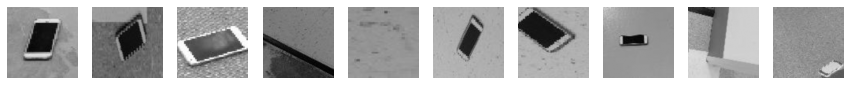

In [95]:
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_test_std[i])
  plt.axis('off')
print(y_pred_cl[0:10])

Text(0.5, 1.0, 'Training and validation loss')

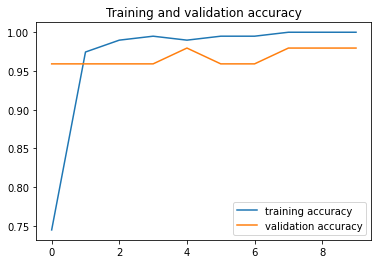

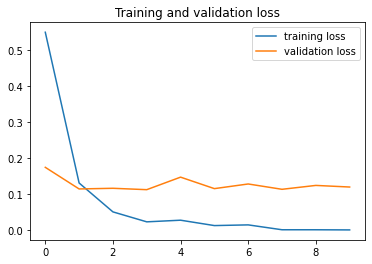

In [96]:
accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')


We can see that VGG is working really good and we have achived higher accuracy using tranfer learning.